# 1. Data Scrapping

In [ ]:
# For yt comment sentiment
!pip install youtube-comment-downloader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 26.2 MB/s eta 0:00:00


In [ ]:
# Needed library
from youtube_comment_downloader import *
from itertools import islice
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Scraping function
def scraping(id_youtube, num):
  downloader = YoutubeCommentDownloader()
  comment = downloader.get_comments(id_youtube)
  data = [comment for comment in islice(comment, num)]
  df = pd.DataFrame(data)
  return df

In [ ]:
# Scrap 500 comments
df = scraping('M008SpVf7Hc', 500)
df

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed
0,UgxnWpJtiWmB7Lbn2HJ4AaABAg,Rasis vs fasis,1 day ago,@joeabidenpapilaiyya5077,UCjnYMoWjIcJ324pJ-Q7G4Hw,0,,https://yt3.ggpht.com/n5JImlTtf_MmXIdgT3HTC-0G...,False,False,1.758013e+09
1,Ugw_irbaNq_nqqXMk2R4AaABAg,Allhamdullilah,1 day ago,@adrigo-b8p,UCsVQV1-Kn5Kt0YqiCVNPaKQ,0,,https://yt3.ggpht.com/pqy9Cet7-wF-yfeVz906WtwS...,False,False,1.758013e+09
2,UgwlJdE9yqUYvngweuB4AaABAg,Semestinya rakyat AS menolak pemerintahan Trum...,1 day ago,@zulkarnain2374,UCufIXKbdXRAgmnU7oR1Pt9A,0,,https://yt3.ggpht.com/ytc/AIdro_kuJSVLRZl80O5S...,False,False,1.758013e+09
3,Ugwl90kn8prsORG115p4AaABAg,Negeri sendiri GA AMAN malah mau atur dunia...,1 day ago,@UntungSusilo-c9m,UC6UhHFGswkRi-a8_gMYV1ag,0,,https://yt3.ggpht.com/ytc/AIdro_mepZNFg0IkDgvV...,False,False,1.758013e+09
4,UgyDyjlPKTKezTZr1xh4AaABAg,😂😂😂😂,1 day ago,@apaanmodal,UChmb9yYQShNu2AUk-AnHnQw,0,,https://yt3.ggpht.com/0ISFrxRDZXr8vM7kqw8576Ar...,False,False,1.758013e+09
...,...,...,...,...,...,...,...,...,...,...,...
495,UgxbzLMDLWobD6WajmZ4AaABAg,"Dendam amarah bunuh orang, jelas kerjaan iblis...",6 days ago,@kariyatikuswandi8256,UCziTR7CKFN8OJEU9br_2-WA,0,,https://yt3.ggpht.com/ytc/AIdro_nxFAuatC6Y5P0m...,False,False,1.757581e+09
496,UgzcxvMqE1ejKQfSsYt4AaABAg,Ada yang tidak beres dengan para pejabat pemer...,6 days ago,@Rahmat-z6o,UCWgRD6u2b9kuQp2moBTd9Cw,28,6,https://yt3.ggpht.com/ytc/AIdro_lXNBnVor2T5FVc...,False,False,1.757581e+09
497,UgyjqM6E5SkNNrdC3G54AaABAg,"Nekat, tembak orang di Utah, sarang-nya orang ...",6 days ago,@DionDamaris,UC0LcM8vcTmQQmDTWWAkucvQ,1,,https://yt3.ggpht.com/ytc/AIdro_kVxwok8avNxB1i...,False,False,1.757581e+09
498,UgygHuH1TCGxxB95kn94AaABAg,Tp memang orng ini terlalu berani mengungkapka...,6 days ago,@bonaventurapabendonseptiad556,UCBxvykIIyecjzAZIVThq2eA,10,5,https://yt3.ggpht.com/ytc/AIdro_l-sTb0TDAUjJSz...,False,False,1.757581e+09


# 2. Data Cleaning & Prepocessing

In [23]:
def cleaning_text(text):
  text = text.lower()
  text = re.sub(r'@\w+|#w+l', '', text)
  text = re.sub(r'http\S+|wwwS+|https\S+', '', text)
  text = text.strip()
  text = re.sub(r'(.)\1{2,}', r'\1\1', text)
  emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F700-\U0001F77F"  # alchemical symbols
        "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supplemental Arrows-A
        "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        "\U0001FA00-\U0001FA6F"  # Chess Symbols
        "\U00002702-\U000027B0"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
  text = emoji_pattern.sub(r'', text)
  return text

def preprocess_text(text):
  text = cleaning_text(text)
  tokens = word_tokenize(text)
  processed_tokens = tokens
  stop_words = set(stopwords.words('indonesian'))
  filtered_tokens = [word for word in processed_tokens if word not in stop_words]
  return ' '.join(filtered_tokens).strip()

In [24]:
df['clean_text'] = df['text'].apply(preprocess_text)
df

,cid,text,time,author,channel,votes,replies,photo,heart,reply,time_parsed,clean_text
0,UgxnWpJtiWmB7Lbn2HJ4AaABAg,Rasis vs fasis,1 day ago,@joeabidenpapilaiyya5077,UCjnYMoWjIcJ324pJ-Q7G4Hw,0,,https://yt3.ggpht.com/n5JImlTtf_MmXIdgT3HTC-0G...,False,False,1.758013e+09,rasis vs fasis
1,Ugw_irbaNq_nqqXMk2R4AaABAg,Allhamdullilah,1 day ago,@adrigo-b8p,UCsVQV1-Kn5Kt0YqiCVNPaKQ,0,,https://yt3.ggpht.com/pqy9Cet7-wF-yfeVz906WtwS...,False,False,1.758013e+09,allhamdullilah
2,UgwlJdE9yqUYvngweuB4AaABAg,Semestinya rakyat AS menolak pemerintahan Trum...,1 day ago,@zulkarnain2374,UCufIXKbdXRAgmnU7oR1Pt9A,0,,https://yt3.ggpht.com/ytc/AIdro_kuJSVLRZl80O5S...,False,False,1.758013e+09,semestinya rakyat as menolak pemerintahan trum...
3,Ugwl90kn8prsORG115p4AaABAg,Negeri sendiri GA AMAN malah mau atur dunia...,1 day ago,@UntungSusilo-c9m,UC6UhHFGswkRi-a8_gMYV1ag,0,,https://yt3.ggpht.com/ytc/AIdro_mepZNFg0IkDgvV...,False,False,1.758013e+09,negeri ga aman atur dunia ..
4,UgyDyjlPKTKezTZr1xh4AaABAg,😂😂😂😂,1 day ago,@apaanmodal,UChmb9yYQShNu2AUk-AnHnQw,0,,https://yt3.ggpht.com/0ISFrxRDZXr8vM7kqw8576Ar...,False,False,1.758013e+09,
...,...,...,...,...,...,...,...,...,...,...,...,...
495,UgxbzLMDLWobD6WajmZ4AaABAg,"Dendam amarah bunuh orang, jelas kerjaan iblis...",6 days ago,@kariyatikuswandi8256,UCziTR7CKFN8OJEU9br_2-WA,0,,https://yt3.ggpht.com/ytc/AIdro_nxFAuatC6Y5P0m...,False,False,1.757581e+09,"dendam amarah bunuh orang , kerjaan iblis , ke..."
496,UgzcxvMqE1ejKQfSsYt4AaABAg,Ada yang tidak beres dengan para pejabat pemer...,6 days ago,@Rahmat-z6o,UCWgRD6u2b9kuQp2moBTd9Cw,28,6,https://yt3.ggpht.com/ytc/AIdro_lXNBnVor2T5FVc...,False,False,1.757581e+09,beres pejabat pemerintahannya keributan demo b...
497,UgyjqM6E5SkNNrdC3G54AaABAg,"Nekat, tembak orang di Utah, sarang-nya orang ...",6 days ago,@DionDamaris,UC0LcM8vcTmQQmDTWWAkucvQ,1,,https://yt3.ggpht.com/ytc/AIdro_kVxwok8avNxB1i...,False,False,1.757581e+09,"nekat , tembak orang utah , sarang-nya orang k..."
498,UgygHuH1TCGxxB95kn94AaABAg,Tp memang orng ini terlalu berani mengungkapka...,6 days ago,@bonaventurapabendonseptiad556,UCBxvykIIyecjzAZIVThq2eA,10,5,https://yt3.ggpht.com/ytc/AIdro_l-sTb0TDAUjJSz...,False,False,1.757581e+09,tp orng berani dn tidk takut dngn sentimen ora...


# 3. Tokenization & Padding

In [25]:
MAX_VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 100

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer_tf = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer_tf.fit_on_texts(df['clean_text'])
X_sequences = tokenizer_tf.texts_to_sequences(df['clean_text'])
X_padded = pad_sequences(X_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

print(f"vocab size: {len(tokenizer_tf.word_index)}")
print(f"shape: {X_padded.shape}")

vocab size: 1985
shape: (500, 100)


# 4. Create Sentiment for every comments (Transformer)

In [27]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

pretrained_model = 'mdhugol/indonesia-bert-sentiment-classification'
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model)
tokenizer = AutoTokenizer.from_pretrained(pretrained_model)
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


# 5. Labelling

In [28]:
def sentiment_text(text):
  label_index = {'LABEL_0': 'Netral', 'LABEL_1': 'Positif', 'LABEL_2': 'Negatif'}
  truncated_text = text[:512]
  label = sentiment_analysis(truncated_text)[0]['label']
  return label_index[label]

In [29]:
df['sentiment'] = df['clean_text'].apply(sentiment_text)
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


sentiment
Negatif    352
Positif     82
Netral      66
Name: count, dtype: int64


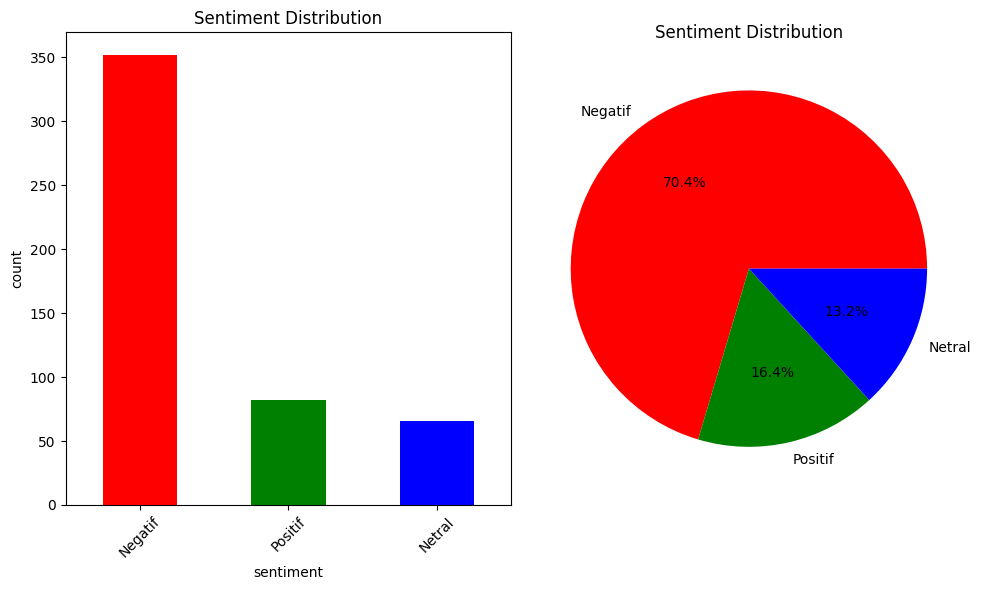

In [30]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sentiment_counts.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('sentiment')
plt.ylabel('count')
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['red', 'green', 'blue'])
plt.title('Sentiment Distribution')
plt.tight_layout()
plt.show()

# Splitting & Encoding

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size = 0.2, random_state = 42)

print(f"training: {X_train.shape}")
print(f"testing: {X_test.shape}")

training: (400, 100)
testing: (100, 100)


# 6. Modelling

In [32]:
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Embedding(MAX_VOCAB_SIZE, 64, input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [33]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    patience=5,
    restore_best_weights=True
)

# Training Model

In [35]:
training_model = model.fit(
    X_train, y_train,
    epochs = 20,
    validation_data = (X_test, y_test),
    callbacks = [early_stopping],
    verbose = 1
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.5880 - loss: 0.9948 - val_accuracy: 0.7000 - val_loss: 0.8330
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7020 - loss: 0.8423 - val_accuracy: 0.7000 - val_loss: 0.8050
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7049 - loss: 0.8011 - val_accuracy: 0.7000 - val_loss: 0.7835
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7076 - loss: 0.7823 - val_accuracy: 0.7000 - val_loss: 0.7540
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6911 - loss: 0.7790 - val_accuracy: 0.7100 - val_loss: 0.7011
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7324 - loss: 0.6714 - val_accuracy: 0.7300 - val_loss: 0.6738
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7649 - loss: 0.5095 - val_accuracy: 0.7000 - val_loss: 0.7558
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9445 - loss: 0.2398 - val_accuracy: 0.7000 - 

# 7. Model Evaluation

In [36]:
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(f"Test Acuracy: {model_accuracy}")
print(f"Test Loss: {model_loss}")

Test Acuracy: 0.7300000190734863
Test Loss: 0.673765242099762


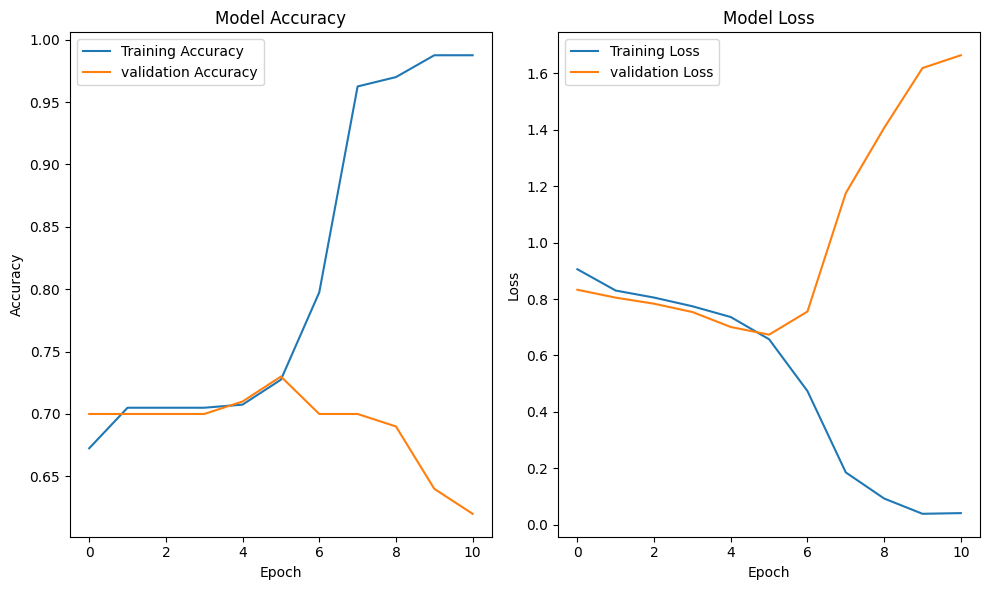

In [37]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.plot(training_model.history['accuracy'], label='Training Accuracy')
plt.plot(training_model.history['val_accuracy'], label='validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(training_model.history['loss'], label='Training Loss')
plt.plot(training_model.history['val_loss'], label='validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 8. New Data Prediction

In [46]:
data_baru = [
    "Kematian itu merupakan peristiwa yang tidak bisa diprediksi",
    "Charlie Kirk merupakan trending topic bulan ini",
    "Charlie Kirk adalah orang yang buruk dan tidak berperasaan",
    "Walau Charlie Kirk sudah tiada, kita harus tetap tegar"
]

data_baru_clean = [preprocess_text(text) for text in data_baru]
new_sequences = tokenizer_tf.texts_to_sequences(data_baru_clean)
new_padded = pad_sequences(new_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

predictions = model.predict(new_padded)

predicted_labels = np.argmax(predictions, axis=1)
predicted_sentiments = label_encoder.inverse_transform(predicted_labels)

for text, sentiment in zip(data_baru, predicted_sentiments):
  print(f"Text: {text}")
  print(f"Sentiment: {sentiment}")

print(f"\nKesimpulan: class imbalance menyebabkan semua data menjadi sentiment negatif")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Text: Kematian itu merupakan peristiwa yang tidak bisa diprediksi
Sentiment: Netral
Text: Charlie Kirk merupakan trending topic bulan ini
Sentiment: Netral
Text: Charlie Kirk adalah orang yang buruk dan tidak berperasaan
Sentiment: Negatif
Text: Walau Charlie Kirk sudah tiada, kita harus tetap tegar
Sentiment: Netral

Kesimpulan: class imbalance menyebabkan semua data menjadi sentiment negatif
